In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from LPQ import *
import os
import random

%matplotlib inline

In [3]:
classes = ['Scheherazade New', 'Marhey', 'Lemonada','IBM Plex Sans Arabic' ]
folders = [r"D:\Downloads\College\Neural Networks\Project\archive\fonts-dataset\Scheherazade New",r"D:\Downloads\College\Neural Networks\Project\archive\fonts-dataset\Marhey",r"D:\Downloads\College\Neural Networks\Project\archive\fonts-dataset\Lemonada",r"D:\Downloads\College\Neural Networks\Project\archive\fonts-dataset\IBM Plex Sans Arabic"]

# Preprocessing Step

In [4]:
def preprocess_image(image_path, desired_size=(256, 256)):
    # Read the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply median filter to remove salt and pepper noise
    denoised_img = cv2.medianBlur(img, 3)

    # Threshold the image using Otsu's method
    _, thresh_img = cv2.threshold(denoised_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Check the color of the background at all four corners
    corners = [thresh_img[0, 0], thresh_img[0, -1], thresh_img[-1, 0], thresh_img[-1, -1]]
    white_corners = np.sum(np.array(corners) == 255)

    # If the majority of the corners are white, invert the image to make the background black
    if white_corners > 2:
        thresh_img = cv2.bitwise_not(thresh_img)

    # Resize the image to the desired size
    resized_img = cv2.resize(thresh_img, desired_size, interpolation=cv2.INTER_AREA)

    return resized_img

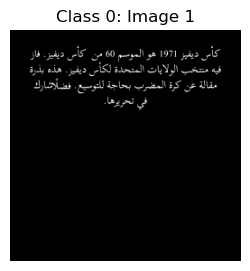

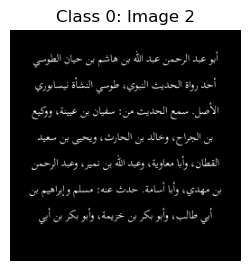

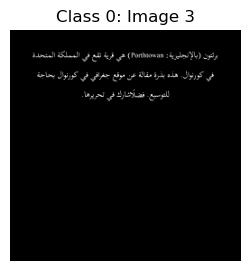

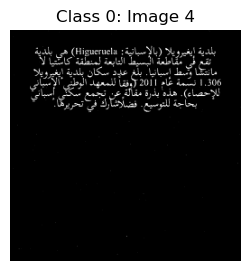

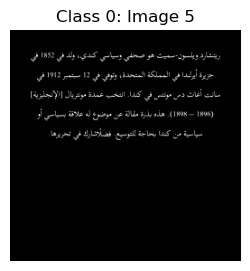

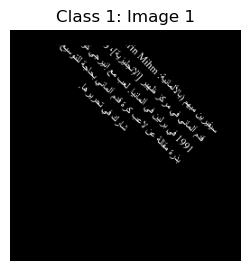

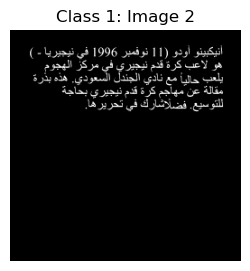

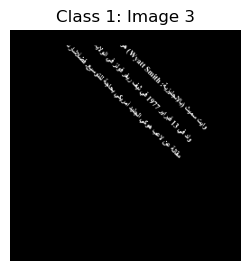

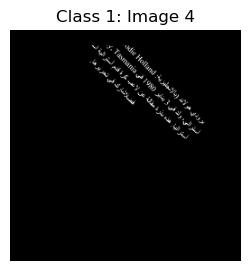

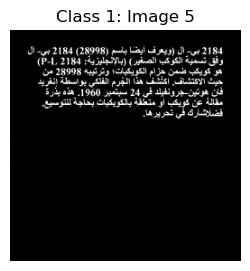

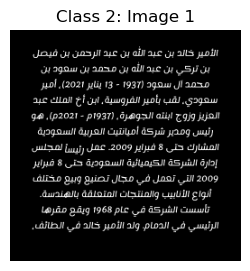

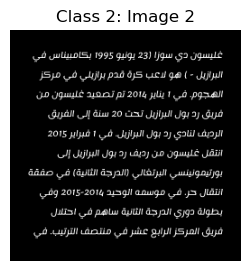

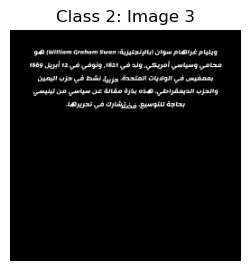

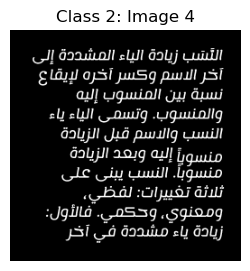

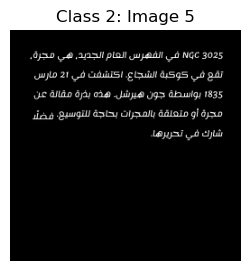

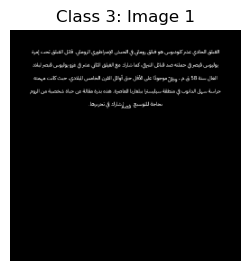

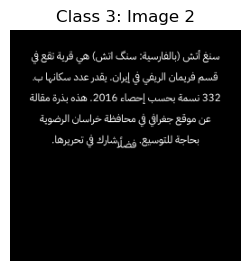

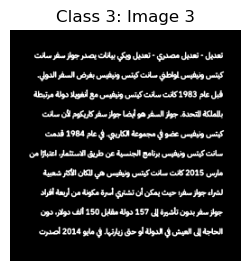

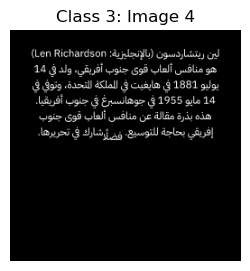

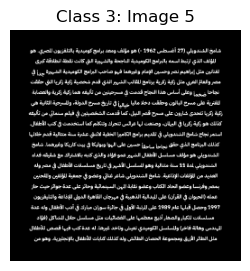

In [5]:
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage.filters import threshold_otsu

for label, folder in enumerate(folders):
    files = [file for file in os.listdir(folder) if file.endswith('.jpeg')]
    # Select 5 random files
    selected_files = random.sample(files, 5)
    for i, filename in enumerate(selected_files):
        # Preprocess image
        processed_img = preprocess_image(os.path.join(folder, filename))
        # Display the processed image
        plt.figure(figsize=(3, 3))
        plt.imshow(processed_img, cmap='gray')
        plt.title(f'Class {label}: Image {i+1}')
        plt.axis('off')
        plt.show()

In [6]:
# Initialize lists to store features and labels
LPQ_Features = []
# LPQ_Features = np.load('LPQ_Features.npy')
labels = []

# Process images for each class
for label, folder in enumerate(folders):
    files = [file for file in os.listdir(folder) if file.endswith('.jpeg')]
    for i, filename in enumerate(files):
        processed_img = preprocess_image(os.path.join(folder, filename))
        
        # Extract LPQ features
        lpq_features = lpq(processed_img)
        
        # Append features and label
        LPQ_Features.append(lpq_features)
        labels.append(label)
        print(f'Class: {classes[label]}, Image No: {i}, Label: {label}')

# Convert lists to numpy arrays
LPQ_Features = np.array(LPQ_Features)
labels = np.array(labels)

np.save('LPQ_Features.npy', LPQ_Features)


Class: Scheherazade New, Image No: 0, Label: 0
Class: Scheherazade New, Image No: 1, Label: 0
Class: Scheherazade New, Image No: 2, Label: 0
Class: Scheherazade New, Image No: 3, Label: 0
Class: Scheherazade New, Image No: 4, Label: 0
Class: Scheherazade New, Image No: 5, Label: 0
Class: Scheherazade New, Image No: 6, Label: 0
Class: Scheherazade New, Image No: 7, Label: 0
Class: Scheherazade New, Image No: 8, Label: 0
Class: Scheherazade New, Image No: 9, Label: 0
Class: Scheherazade New, Image No: 10, Label: 0
Class: Scheherazade New, Image No: 11, Label: 0
Class: Scheherazade New, Image No: 12, Label: 0
Class: Scheherazade New, Image No: 13, Label: 0
Class: Scheherazade New, Image No: 14, Label: 0
Class: Scheherazade New, Image No: 15, Label: 0
Class: Scheherazade New, Image No: 16, Label: 0
Class: Scheherazade New, Image No: 17, Label: 0
Class: Scheherazade New, Image No: 18, Label: 0
Class: Scheherazade New, Image No: 19, Label: 0
Class: Scheherazade New, Image No: 20, Label: 0
Cl

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

X = LPQ_Features
y = labels

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4]
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5, n_jobs=-1)

grid.fit(X, y)

best_params = grid.best_params_
print(f"Best parameters: {best_params}")

best_estimator = grid.best_estimator_

cross_val_scores = cross_val_score(best_estimator, X, y, cv=5)
print(f"Cross-validation scores: {cross_val_scores}")

average_score = cross_val_scores.mean()
print(f"Average cross-validation score: {average_score}")

Fitting 5 folds for each of 420 candidates, totalling 2100 fits
Best parameters: {'C': 1000, 'degree': 3, 'gamma': 10, 'kernel': 'poly'}
Cross-validation scores: [0.98    0.97375 0.985   0.98625 0.96875]
Average cross-validation score: 0.97875


In [8]:
import pickle

with open("final-svm.pkl", 'wb') as file:
    pickle.dump(best_estimator, file)